In [2]:
%matplotlib inline
#installing a plotting library

In [3]:
%pip install geopandas
#running this block without the script above resulted in an error because geopandas wasn't installed.
#this installation method will be used throughout this workflow.
import geopandas
#helps work with geospatial data

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
#useful library for data analysis

In [5]:
pd.options.display.max_rows = 4
#4 rows will be displayed

In [6]:
from matplotlib import pyplot as plt
#helps with plotting

In [7]:
# Import earthpy to use for reprojecting data; conda install -c conda-forge earthpy see https://pypi.org/project/earthpy/

In [8]:
%pip install earthpy
#again using %pip to install earthpy here.
import earthpy as et
#helps with plotting spatial raster and vector data

Note: you may need to restart the kernel to use updated packages.


In [43]:
data = geopandas.read_file("/Users/aniawebb/Desktop/School/USC4/SPRING/SSCI586/Projects/Project3/ISTANBUL_UA2018/Data/ISTANBUL.gpkg")
#here I had to direct the variable assignment to my unique folder that contained the data for Project 3, part 2: Istanbul.

In [11]:
# Identify the coordinate system
print(data.crs)

epsg:3035


In [12]:
data = data.drop(0)
#drops specified column or row values 

In [13]:
data.head(3)
#looks at the first 3 rows of data of landuse

,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
1,TR,Istanbul ...,TR012L1,11220,Discontinuous medium density urban fabric (S.L...,2020-12,93494-TR012L1,541.426820,17177.614280,None,0,"MULTIPOLYGON (((5981000.000 2176116.658, 59810..."
2,TR,Istanbul ...,TR012L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-12,53858-TR012L1,287.405330,4339.887459,None,0,"MULTIPOLYGON (((5981583.488 2177000.000, 59815..."
3,TR,Istanbul ...,TR012L1,11100,Continuous urban fabric (S.L. : > 80%),2020-12,4308-TR012L1,508.080425,8030.760600,None,424,"MULTIPOLYGON (((5939902.819 2106000.000, 59399..."


In [14]:
# Calculate the area of each polygon:

In [15]:
data.geometry.area

1         17177.614280
2          4339.887459
              ...     
248604    21691.759905
248605    76837.699894
Length: 248605, dtype: float64

<AxesSubplot:>

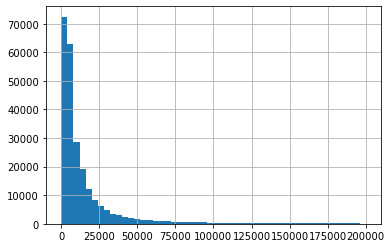

In [16]:
data.geometry.area.hist(bins=50, range=(0,0.2e6))
#creates a plot with intervals of 50 and a range of 0,0.2e6

In [17]:
# Plot the shapes with coloring based on another column

In [18]:
bounds = data.bounds
bounds

,minx,miny,maxx,maxy
1,5.980999e+06,2.175943e+06,5.981171e+06,2.176123e+06
2,5.981557e+06,2.176983e+06,5.981678e+06,2.177036e+06
...,...,...,...,...
248604,5.935362e+06,2.152717e+06,5.935561e+06,2.152944e+06
248605,5.867556e+06,2.186037e+06,5.868205e+06,2.186487e+06


In [42]:
#data = data[data['class_2018'] != 'Water bodies']


array([], dtype=object)

In [44]:
data['class_2018'].unique()

array(['Other roads and associated land',
       'Discontinuous medium density urban fabric (S.L. : 30% - 50%)',
       'Discontinuous dense urban fabric (S.L. : 50% -  80%)',
       'Continuous urban fabric (S.L. : > 80%)',
       'Discontinuous very low density urban fabric (S.L. : < 10%)',
       'Industrial, commercial, public, military and private units',
       'Discontinuous low density urban fabric (S.L. : 10% - 30%)',
       'Pastures', 'Arable land (annual crops)', 'Isolated structures',
       'Permanent crops (vineyards, fruit trees, olive groves)',
       'Forests', 'Land without current use', 'Port areas', 'Airports',
       'Mineral extraction and dump sites', 'Construction sites',
       'Fast transit roads and associated land', 'Green urban areas',
       'Sports and leisure facilities',
       'Herbaceous vegetation associations (natural grassland, moors...)',
       'Complex and mixed cultivation patterns', 'Water',
       'Open spaces with little or no vegetation (b

In [106]:
data['fua_code'].unique()

array(['TR012L1'], dtype=object)

In [21]:
# Import descartes to use for plotting polygons in geopandas
%pip install descartes
#%pip was required again here to install descartes.
import descartes
#helps with measuring and plotting geometry

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Study Area: Istanbul, Turkey')

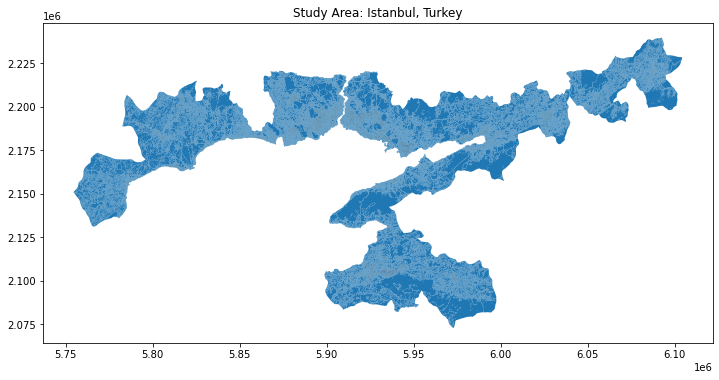

In [49]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
data.plot(ax=ax)
ax.set_title("Study Area: Istanbul, Turkey")

Text(0.5, 1.0, 'Istanbul Land-use in 2018')

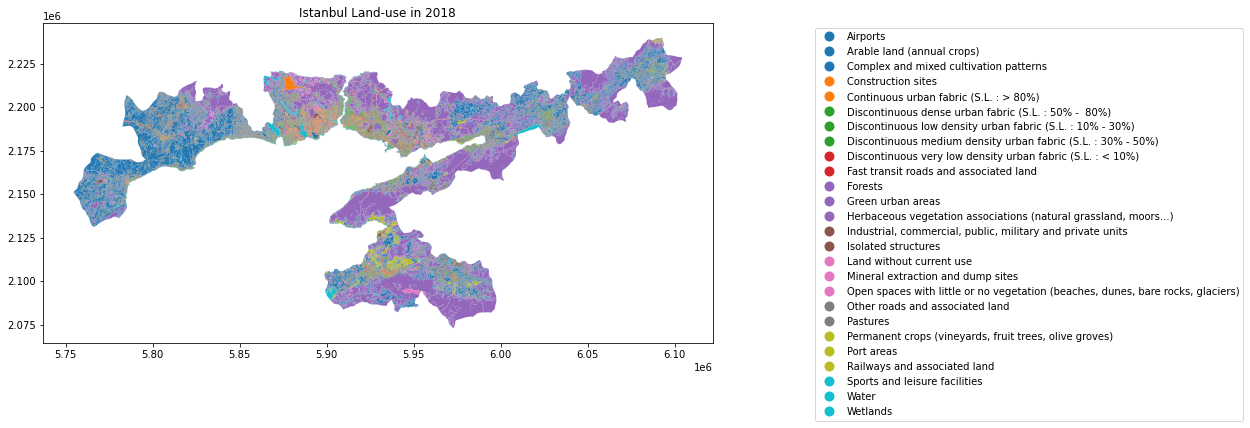

In [48]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
data.plot(column='class_2018', legend=True, ax=ax)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0, 1, 1))
ax.set_title("Istanbul Land-use in 2018")

Text(0.5, 1.0, 'Green Urban Areas in Istanbul')

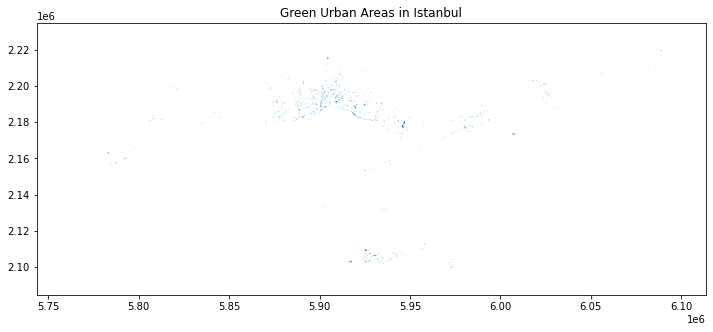

In [92]:
Green = data[data['class_2018']=='Green urban areas']

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
Green.plot(ax=ax)
ax.set_title("Green Urban Areas in Istanbul")

In [60]:
streets = geopandas.read_file("/Users/aniawebb/Desktop/School/USC4/SPRING/SSCI586/Projects/Project3/ISTANBUL_UA2018/Data/ISTANBUL.gpkg")
#I had to change the pathway to where my streets data is found. 

In [134]:
print(streets.crs)
streets.head(3)

epsg:3035


,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,TR,Istanbul ...,TR012L1,12220,Other roads and associated land,2020-12,171422-TR012L1,4.833131e+07,2.019942e+08,None,0,"MULTIPOLYGON (((5912463.557 2145603.821, 59124..."
1,TR,Istanbul ...,TR012L1,11220,Discontinuous medium density urban fabric (S.L...,2020-12,93494-TR012L1,5.414268e+02,1.717761e+04,None,0,"MULTIPOLYGON (((5981000.000 2176116.658, 59810..."
2,TR,Istanbul ...,TR012L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-12,53858-TR012L1,2.874053e+02,4.339887e+03,None,0,"MULTIPOLYGON (((5981583.488 2177000.000, 59815..."


In [26]:
# To display these together, or perform a spatial analysis, do any layers need to be reprojected?...i.e. see https://www.earthdatascience.org/workshops/gis-open-source-python/reproject-vector-data-in-python/

In [62]:
# view the spatial extent of both layers 
print(data.total_bounds)
print(streets.total_bounds)

[5754325.6439 2072836.6512 6104159.0408 2240044.9298]
[5754325.6439 2072836.6512 6104159.0408 2240044.9298]


In [28]:
# reproject the streets layer i.e. using the EPSG code? If they are the same projection, you don't need to reproject one.
# streets_reprojected  = data.to_crs({'init': 'epsg:3035'}) # still works but give a warning; see https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6 - can you fix it?

In [29]:
# view the spatial extent of both layers again 
print(data.total_bounds)
# print(streets_reprojected.total_bounds)

[nan nan nan nan]


(2180000.0, 2190000.0)

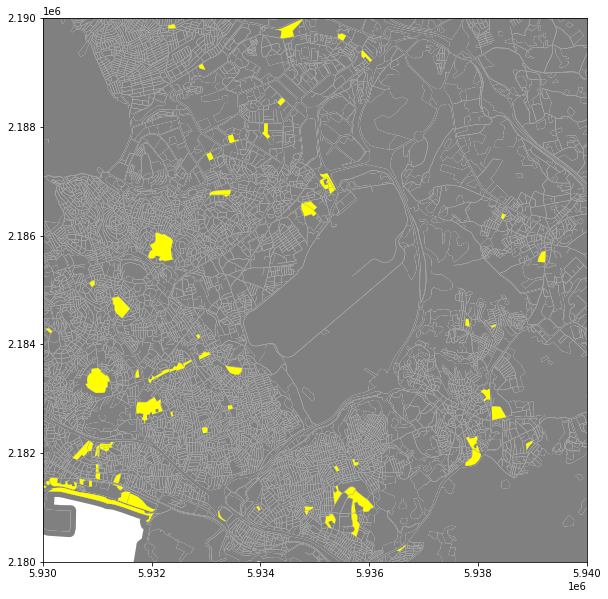

In [94]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
Green.plot(ax=ax, color='yellow')
ax.set_xlim(5.930e+06, 5.940e+06)
ax.set_ylim(2.1800e+06, 2.1900e+06)

(2180000.0, 2190000.0)

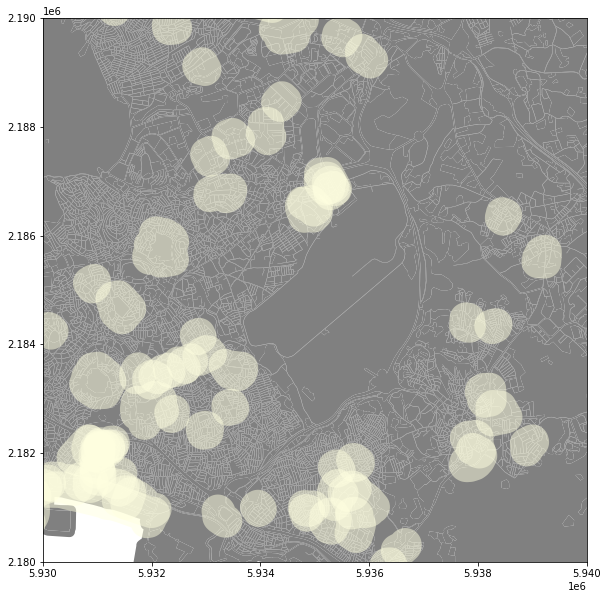

In [96]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
Green.geometry.buffer(300).plot(ax=ax, color='lightyellow',alpha=0.5)
ax.set_xlim(5.930e+06, 5.940e+06)
ax.set_ylim(2.1800e+06, 2.1900e+06)

In [142]:
addresses = geopandas.read_file("/Users/aniawebb/Desktop/School/USC4/SPRING/SSCI586/Projects/Project3/turkey-latest-free/gis_osm_buildings_a_free_1.shp")
#Again the code was altered here to represent the pathway to the Project 3, part 2 data.

In [143]:
print(addresses.crs)

epsg:4326


In [144]:
addresses.head(5)

,osm_id,code,fclass,name,type,geometry
0,4986704,1500,building,İç Hatlar Terminali,None,"POLYGON ((27.67201 37.24428, 27.67229 37.24502..."
1,9865583,1500,building,Çankaya Polikliniği,None,"POLYGON ((32.86449 39.87707, 32.86456 39.87718..."
...,...,...,...,...,...,...
3,9866293,1500,building,None,None,"POLYGON ((32.84971 39.89177, 32.84978 39.89200..."
4,15219614,1500,building,None,None,"POLYGON ((32.81294 39.90986, 32.81322 39.90988..."


In [146]:
#for the next blocks of code to run, the geometry column needs to be point, not polygon
#source for solution: https://gis.stackexchange.com/questions/302430/polygon-to-point-in-geopandas 

#reproject data
addresses_reprojected  = addresses.to_crs('epsg:3035')
addresses_reprojected

#create a copy of addresses to create points from the center of the polygons (centroids) 
pointfile = addresses_reprojected.copy()

# change geometry 
pointfile['geometry'] = pointfile['geometry'].centroid
pointfile.head()

,osm_id,code,fclass,name,type,geometry
0,4986704,1500,building,İç Hatlar Terminali,None,POINT (5886031.334 1756074.875)
1,9865583,1500,building,Çankaya Polikliniği,None,POINT (6254070.062 2159285.244)
...,...,...,...,...,...,...
3,9866293,1500,building,None,None,POINT (6252416.245 2160485.871)
4,15219614,1500,building,None,None,POINT (6248907.109 2161461.365)


In [147]:
# view the spatial extent of all 3 layers 
print(data.total_bounds)
print(streets.total_bounds)
print(pointfile.total_bounds)

[5754325.6439 2072836.6512 6104159.0408 2240044.9298]
[5754325.6439 2072836.6512 6104159.0408 2240044.9298]
[5652732.08177086 1676216.96818463 7317752.69016646 2655154.61532851]


In [35]:
# do you need to reproject the addresses to match the streets layers ? ...i.e. using the EPSG code; still works but gives a warning - can you fix it?
    #I did not receive a warning when running this code. 
# addresses_reprojected  = data.to_crs({'init': 'epsg:3035'})

In [148]:
x = pointfile.geometry.apply(lambda p: p.x)
y = pointfile.geometry.apply(lambda p: p.y)
print(x,y)

0          5.886031e+06
1          6.254070e+06
               ...     
2433284    5.863574e+06
2433285    6.249451e+06
Name: geometry, Length: 2433286, dtype: float64 0          1.756075e+06
1          2.159285e+06
               ...     
2433284    1.729479e+06
2433285    2.169452e+06
Name: geometry, Length: 2433286, dtype: float64


In [38]:
addresses = addresses[(x < 156000).values & (x > 152000) .values & (y < 213000) .values & (y > 210000) .values]

(2180000.0, 2190000.0)

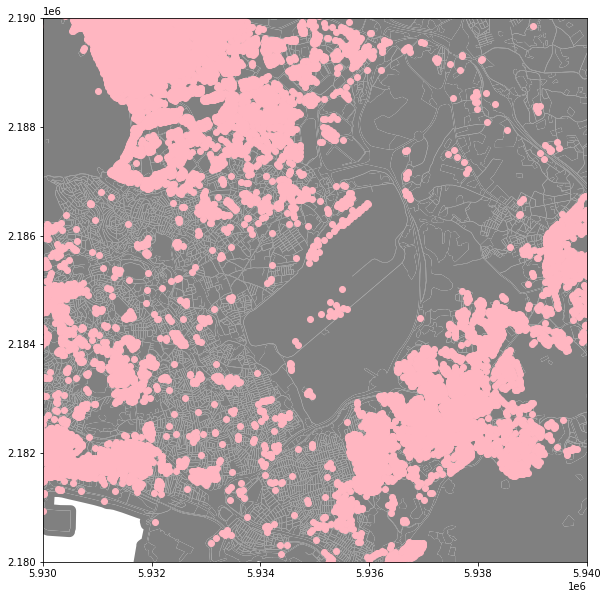

In [151]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
streets.plot(ax=ax, color="grey", linewidth=0.5)
pointfile.plot(ax=ax, color='lightpink')
ax.set_xlim(5.930e+06, 5.940e+06)
ax.set_ylim(2.1800e+06, 2.1900e+06)